# Single-core vs Multi-core Performance

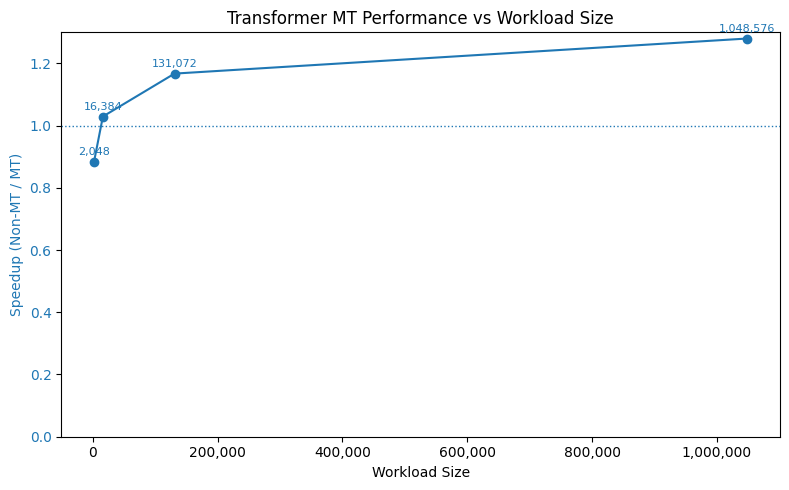

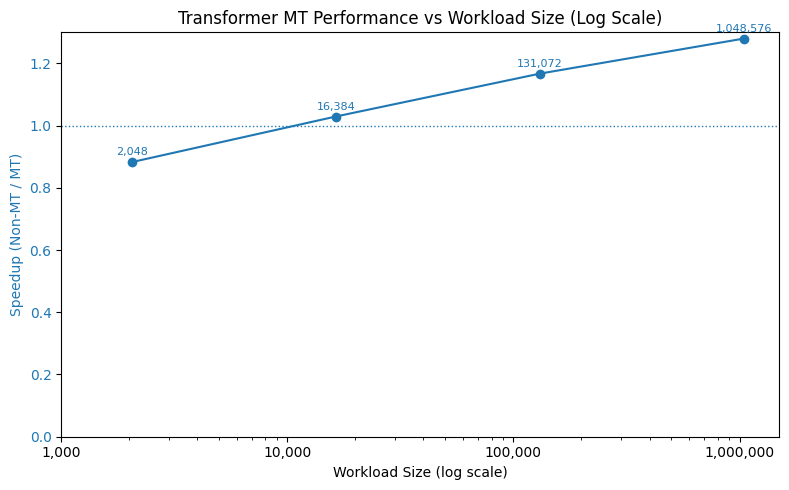

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter
import numpy as np


# === Input Data ===
data = {
    "seq_len": [8, 16, 32, 64],
    "embed_dim": [8, 16, 32, 64],
    "ff_hidden_dim": [16, 32, 64, 128],
    "non_mt_time": [0.000195, 0.000567, 0.002363, 0.012981],
    "mt_time": [0.000221, 0.000551, 0.002025, 0.010144]
}

# === Compute Derived Metrics ===
df = pd.DataFrame(data)
# Workload size is proportional to: seq^2 * embed + seq * embed^2 + embed * ff_hidden * seq
# Self attention: O(seq^2 * embed + seq * embed^2)
# Feed-forward layer: O(embed * ff_hidden * seq)
# The rest is subsumed
df["workload_size"] = (df["seq_len"]**2 * df["embed_dim"]) + (df["seq_len"] * df["embed_dim"]**2) + (df["ff_hidden_dim"] * df["embed_dim"] * df["seq_len"])
df["mt_pct"] = (df["mt_time"] / df["non_mt_time"]) * 100
df["speedup"] = df["non_mt_time"] / df["mt_time"]
df_sorted = df.sort_values("workload_size")

# === Helper to plot both graphs ===
def plot_mt_performance(df_sorted, log_scale=False):
    fig, ax1 = plt.subplots(figsize=(8, 5))

    if log_scale:
        ax1.set_xscale("log")
        ax1.set_xlabel("Workload Size (log scale)")
        plt.title("Transformer MT Performance vs Workload Size (Log Scale)")

        # Set ticks at powers of 10
        tick_values = [10**i for i in range(1, 7)]
        ax1.set_xticks(tick_values)
        ax1.set_xlim(1000, 1_500_000)


        # Label them in plain number format (e.g., 10, 100, 1000...)
        ax1.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))
    else:
        ax1.set_xlabel("Workload Size")
        plt.title("Transformer MT Performance vs Workload Size")
        ax1.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))

    # Primary Y-axis
    color = 'tab:blue'
    ax1.set_ylabel("Speedup (Non-MT / MT)", color=color)
    ax1.plot(df_sorted["workload_size"], df_sorted["speedup"], marker='o', color=color)
    ax1.axhline(1, color=color, linestyle=':', linewidth=1)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_ylim(bottom=0)

    # Secondary Y-axis
    # ax2 = ax1.twinx()
    # color = 'tab:red'
    # ax2.set_ylabel("MT Time (% of Non-MT)", color=color)
    # ax2.plot(df_sorted["workload_size"], df_sorted["mt_pct"], marker='s', linestyle='--', color=color)
    # ax2.axhline(100, color=color, linestyle=':', linewidth=1)
    # ax2.tick_params(axis='y', labelcolor=color)


    # Annotate workload values on speedup line
    for x, y in zip(df_sorted["workload_size"], df_sorted["speedup"]):
        ax1.annotate(f"{int(x):,}", xy=(x, y), xytext=(0, 5), textcoords="offset points",
                    ha='center', fontsize=8, color='tab:blue')

    # # Annotate workload values on mt_pct line
    # for x, y in zip(df_sorted["workload_size"], df_sorted["mt_pct"]):
    #     ax2.annotate(f"{int(x):,}", xy=(x, y), xytext=(0, -10), textcoords="offset points",
    #                 ha='center', fontsize=8, color='tab:red')


    fig.tight_layout()
    # plt.grid(True, which='both' if log_scale else 'major', axis='x')
    plt.show()


# === Plot Both ===
plot_mt_performance(df_sorted, log_scale=False)  # Linear scale
plot_mt_performance(df_sorted, log_scale=True)   # Log scale


# SIMD vs Non-SIMD CPU Performance


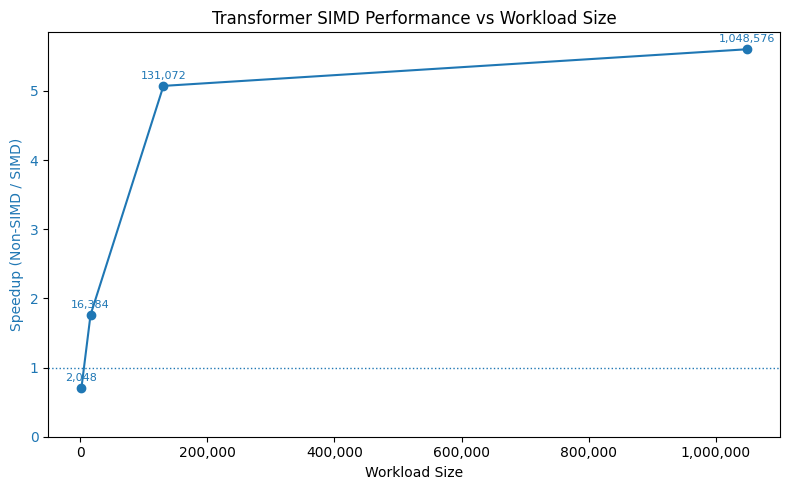

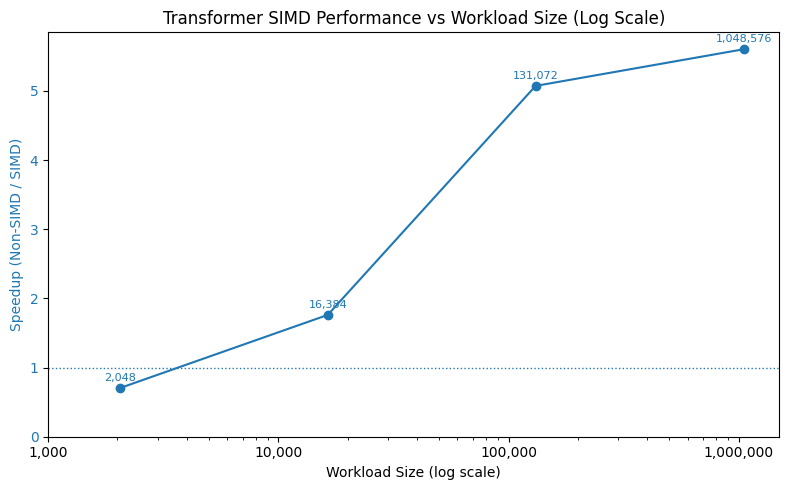

In [ ]:
# for the SIMD data


import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter
import numpy as np


# === Input Data ===
data = {
    "seq_len": [8, 16, 32, 64],
    "embed_dim": [8, 16, 32, 64],
    "ff_hidden_dim": [16, 32, 64, 128],
    "non_simd_time": [0.003352, 0.010425, 0.064123, 0.318173],
    "simd_time": [0.004768, 0.005920, 0.012643, 0.056804]
}

# === Compute Derived Metrics ===
df = pd.DataFrame(data)
# Workload size is proportional to: seq^2 * embed + seq * embed^2 + embed * ff_hidden * seq
# Self attention: O(seq^2 * embed + seq * embed^2)
# Feed-forward layer: O(embed * ff_hidden * seq)
# The rest is subsumed
df["workload_size"] = (df["seq_len"]**2 * df["embed_dim"]) + (df["seq_len"] * df["embed_dim"]**2) + (df["ff_hidden_dim"] * df["embed_dim"] * df["seq_len"])
df["simd_pct"] = (df["simd_time"] / df["non_simd_time"]) * 100
df["speedup"] = df["non_simd_time"] / df["simd_time"]
df_sorted = df.sort_values("workload_size")

# === Helper to plot both graphs ===
def plot_mt_performance(df_sorted, log_scale=False):
    fig, ax1 = plt.subplots(figsize=(8, 5))

    if log_scale:
        ax1.set_xscale("log")
        ax1.set_xlabel("Workload Size (log scale)")
        plt.title("Transformer SIMD Performance vs Workload Size (Log Scale)")

        # Set ticks at powers of 10
        tick_values = [10**i for i in range(1, 7)]
        ax1.set_xticks(tick_values)
        ax1.set_xlim(1000, 1_500_000)


        # Label them in plain number format (e.g., 10, 100, 1000...)
        ax1.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))
    else:
        ax1.set_xlabel("Workload Size")
        plt.title("Transformer SIMD Performance vs Workload Size")
        ax1.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))

    # Primary Y-axis
    color = 'tab:blue'
    ax1.set_ylabel("Speedup (Non-SIMD / SIMD)", color=color)
    ax1.plot(df_sorted["workload_size"], df_sorted["speedup"], marker='o', color=color)
    ax1.axhline(1, color=color, linestyle=':', linewidth=1)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_ylim(bottom=0)

    # Secondary Y-axis
    # ax2 = ax1.twinx()
    # color = 'tab:red'
    # ax2.set_ylabel("MT Time (% of Non-MT)", color=color)
    # ax2.plot(df_sorted["workload_size"], df_sorted["mt_pct"], marker='s', linestyle='--', color=color)
    # ax2.axhline(100, color=color, linestyle=':', linewidth=1)
    # ax2.tick_params(axis='y', labelcolor=color)


    # Annotate workload values on speedup line
    for x, y in zip(df_sorted["workload_size"], df_sorted["speedup"]):
        ax1.annotate(f"{int(x):,}", xy=(x, y), xytext=(0, 5), textcoords="offset points",
                    ha='center', fontsize=8, color='tab:blue')

    # # Annotate workload values on mt_pct line
    # for x, y in zip(df_sorted["workload_size"], df_sorted["mt_pct"]):
    #     ax2.annotate(f"{int(x):,}", xy=(x, y), xytext=(0, -10), textcoords="offset points",
    #                 ha='center', fontsize=8, color='tab:red')


    fig.tight_layout()
    # plt.grid(True, which='both' if log_scale else 'major', axis='x')
    plt.show()


# === Plot Both ===
plot_mt_performance(df_sorted, log_scale=False)  # Linear scale
plot_mt_performance(df_sorted, log_scale=True)   # Log scale


# Cache size impact

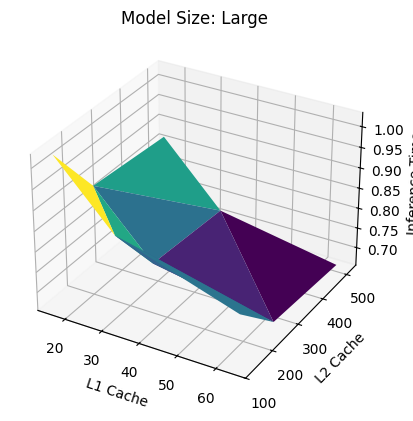

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
L1 = np.array([16, 16, 16, 32, 32, 32, 64, 64, 64])
L2 = np.array([128, 256, 512, 128, 256, 512, 128, 256, 512])
# Small model: T = np.array([0.000837559, 0.000822047, 0.000821943,0.000796146, 0.000753677, 0.000753604, 0.00078358, 0.000736028, 0.00073602])
# Medium model T = np.array([0.0919923, 0.086622, 0.0823898, 0.0863654, 0.0807414, 0.0767801, 0.0692619, 0.0635353, 0.059641])
T = np.array([1.02655, 0.881648, 0.865614, 0.877316, 0.732302, 0.716079, 0.78052, 0.678804, 0.662673])
ax.plot_trisurf(L1, L2, T, cmap='viridis')
ax.set_xlabel('L1 Cache')
ax.set_ylabel('L2 Cache')
ax.set_zlabel('Inference Time')
plt.title('Model Size: Large')
plt.show()